In [49]:
from google.colab import files
uploaded = files.upload()
#구글드라이브 연동법 :https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/


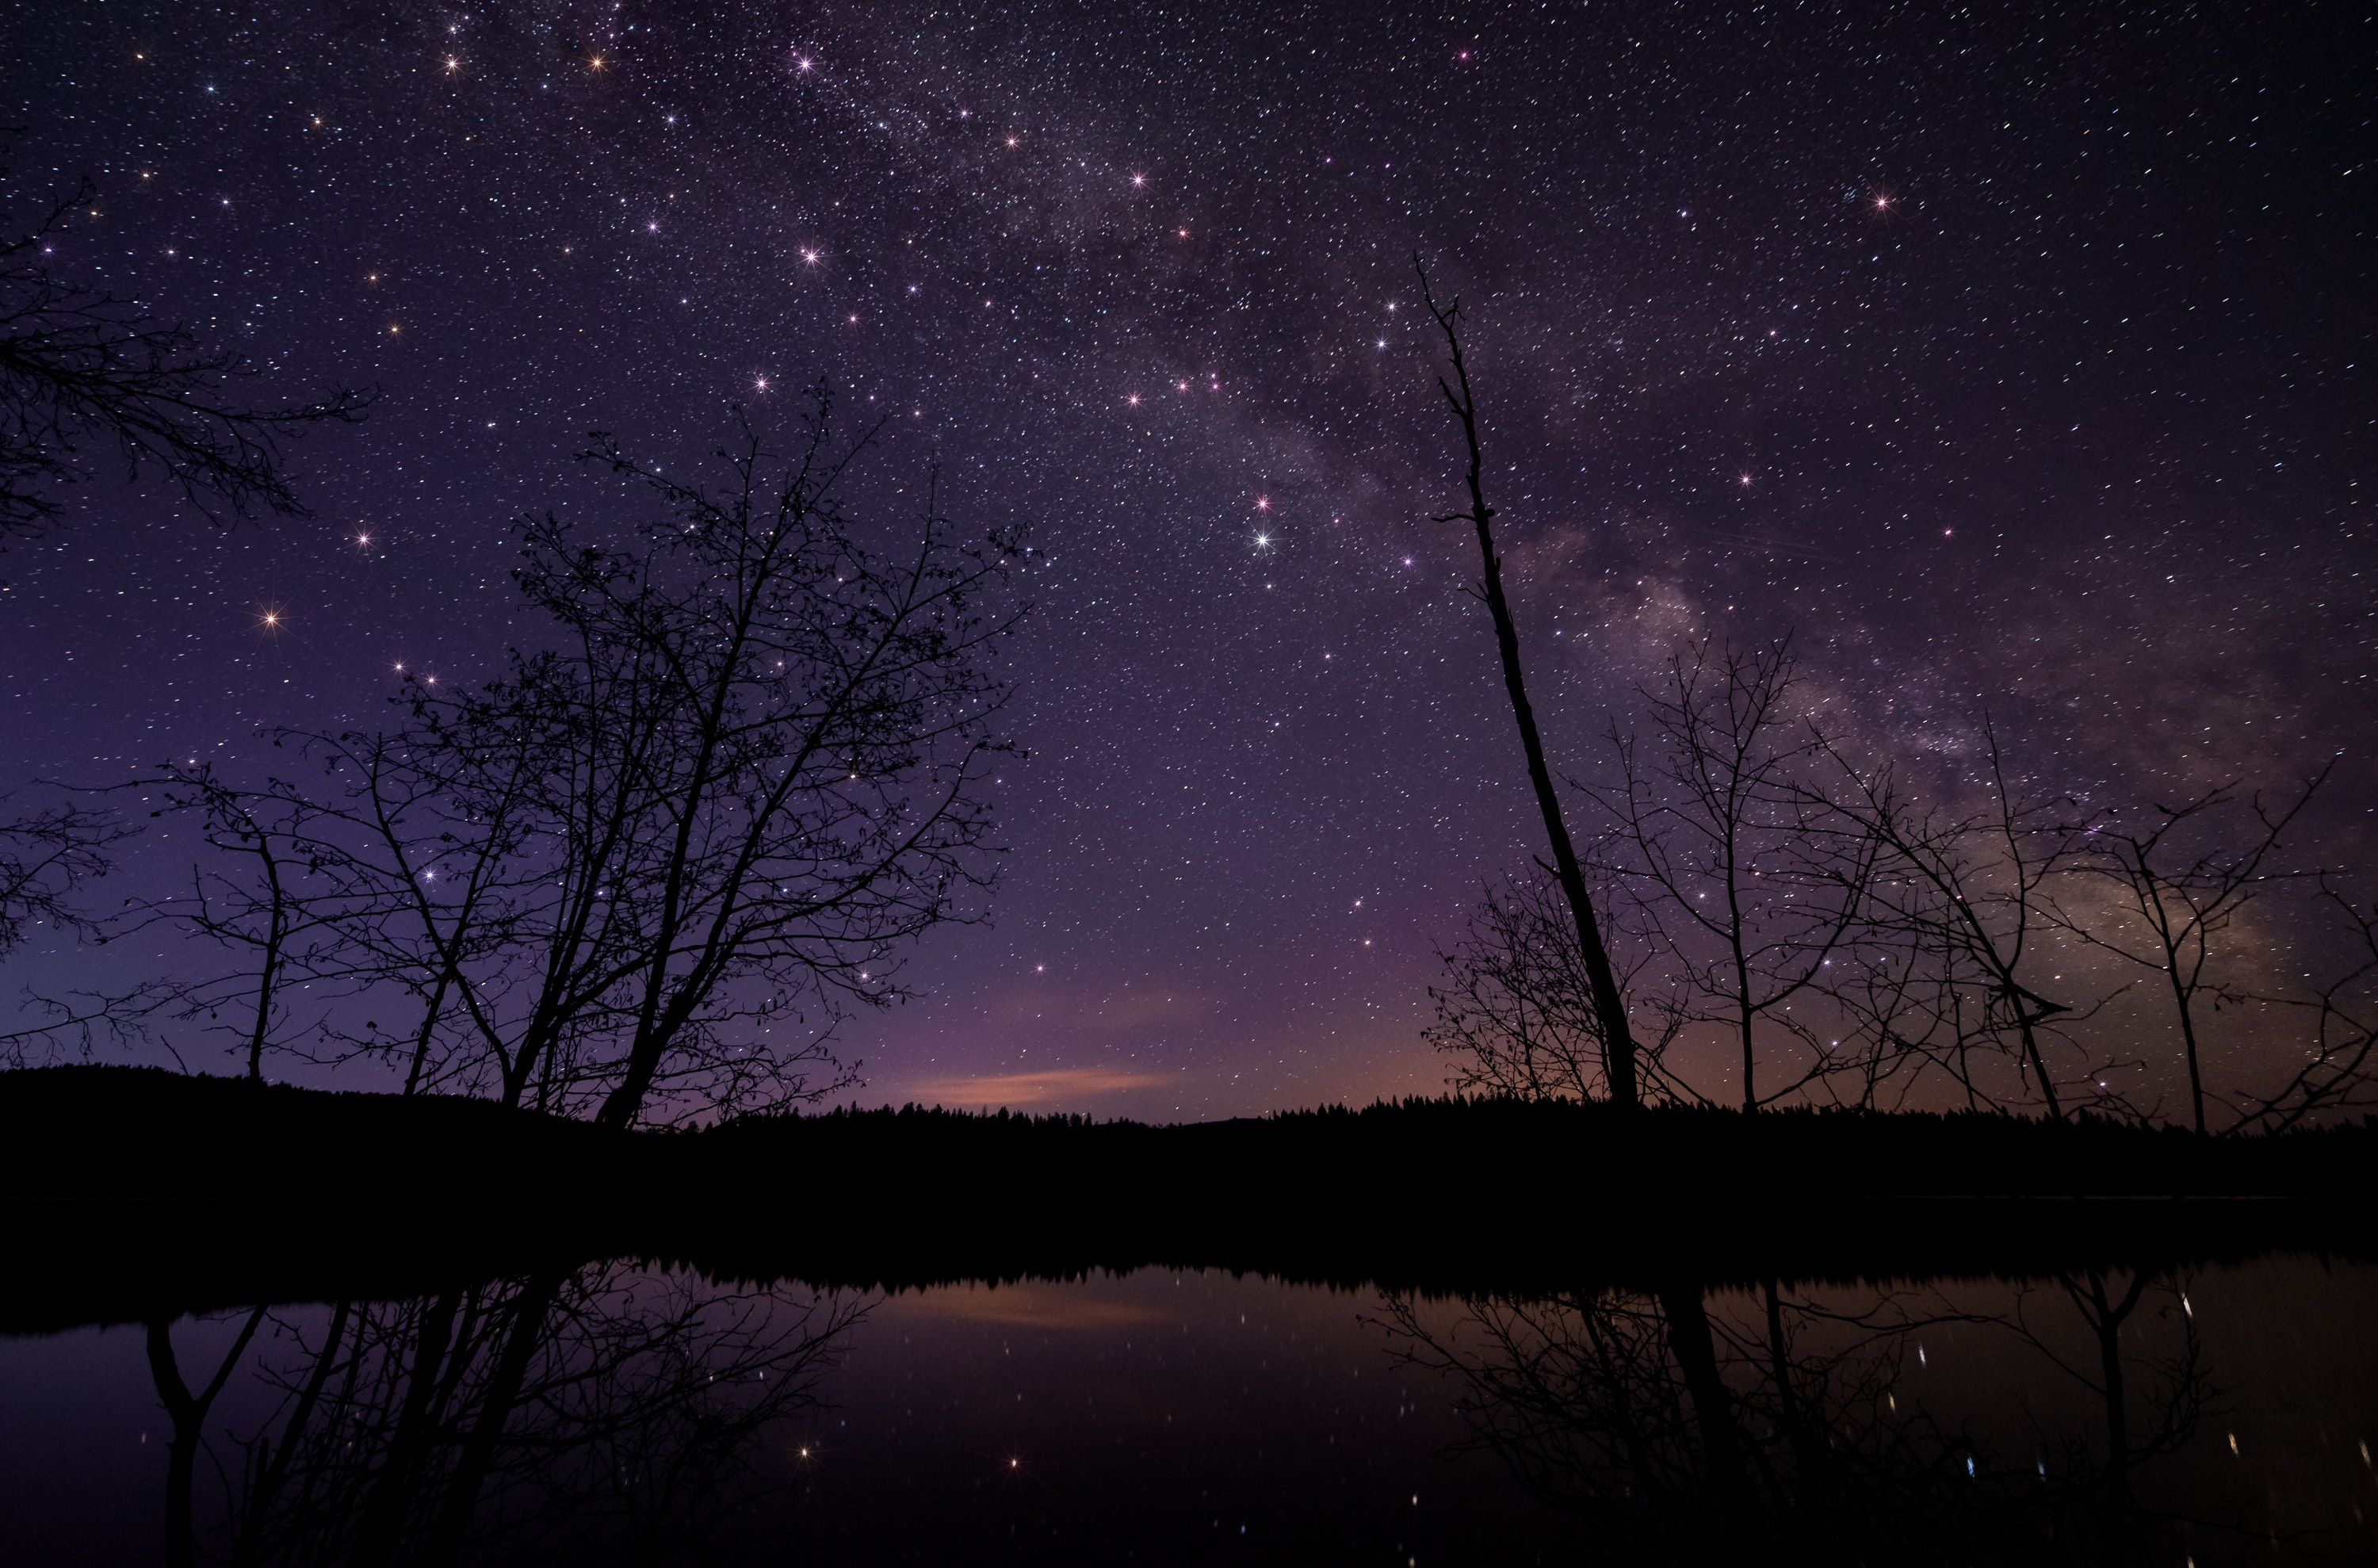

In [50]:
from IPython.display import Image
Image('a.jpg')

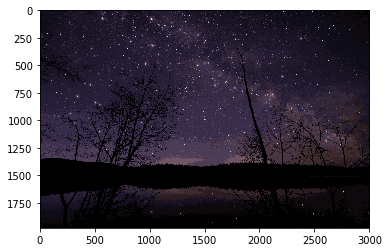

In [52]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('a.jpg')

Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 15
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#cv2_imshow('res2',res2)
import matplotlib.pyplot as plt
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
iplot=plt.imshow(res2)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

0.0562278395685878 [76. 60. 85.]
0.13302612066059993 [14.48933146 10.46799438 18.36130898]
0.22167307044152343 [ 1.00000000e+00 -3.94908994e-10  1.00000000e+00]
0.16435709470845972 [42.49533833 32.86066985 55.40866712]
0.003302999662959218 [179.30117347 168.02658163 189.57576531]
0.10716902595214021 [55. 44. 73.]
0.14443174924165825 [34.02826413 24.81130565 41.56608304]
0.011112571621166162 [112.  84.  97.]
0.10684108527131783 [24. 18. 34.]
0.05185844287158746 [68.28986638 49.28986638 57.57973275]


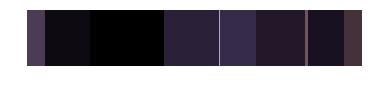

In [53]:
#https://inyl.github.io/programming/2017/07/31/opencv_image_color_cluster.html
#pip install cv2
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#이미지 읽기
#image = cv2.imread("C:/Users/3182-23/Desktop/TransparentImage.png")

#색 BGR로 가져오기때문에 RGB로 변경
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#차원이 분산되어 있어 수치적 계싼을 하기가 번거로우니 width와 height를 한개의 Array로 통함
image = res2.reshape((res2.shape[0] * res2.shape[1],3))

#sikit-learn의 K-mean알고리즘으로 이미지 학습 -> k개의 데이터 평균을 만들어 데이터를 clustering하는 알고리즘
#가장 가까운 클러스터 어싸인함
k = 10#예제는 5개이하 optimal 
clt = KMeans(n_clusters = k)
clt.fit(image)

#clustering된 컬러값 확인
#for center in clt.cluster_centers_:
#    print(center)

#각 컬러의 분율이 얼마나 되는지 확인(각 클러스터의 픽셀 셈)
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) +1)
    (hist,_) = np.histogram(clt.labels_, bins = numLabels)
    
    # normalize the histogram, such that it sums to one (정규화 )
    hist = hist.astype("float")
    hist /= hist.sum()
    
    # return the histogram
    return hist

hist = centroid_histogram(clt)


#추출한 컬러와 histogram 데이터로 화면에 그래프를 그리는 코드
def plot_colors(hist,centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50,300,3), dtype = "uint8") #이 사각형에 주요 색 넣음
    startX = 0
    
    # loop over the percentage of each cluster and the color of
    # each cluster
    
    for (percent,color) in zip(hist,centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar,(int(startX),0), (int(endX),50), color.astype("uint8").tolist(),-1)
        startX = endX
        print(percent,color)
        
        
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
